<a href="https://colab.research.google.com/github/reypapin/Domain-Name-Classification-with-Contextual-Learning/blob/main/ollama_Llama3_8B_prompting_n_size_feature_comparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ollama

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! sudo apt-get install -y pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 0s (1,304 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initial

In [4]:
! curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0>>> Downloading ollama...
100 10091    0 10091    0     0  40536      0 --:--:-- --:--:-- --:--:-- 40526
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [5]:
import os
import threading
import subprocess
import requests
import json

def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

In [6]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [7]:
! ollama run llama3

pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠙ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 00e1317cbf74...   0% ▕▏  16 MB/4.7 GB    

In [8]:
ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [9]:
import pandas as pd
import requests
import json

# File paths
dga_test_file = "/content/drive/My Drive/df_dga_test.csv"
normal_test_file = "/content/drive/My Drive/df_normal_test.csv"
dga_train_file = "/content/drive/My Drive/df_dga_train.csv"
normal_train_file = "/content/drive/My Drive/df_normal_train.csv"

# Load CSV files into dataframes
df_dga_test = pd.read_csv(dga_test_file)
df_dga_test_limited = df_dga_test.groupby('family').head(10)  # Remember are 54 family

df_normal_test = pd.read_csv(normal_test_file, nrows=500)

df_dga_train = pd.read_csv(dga_train_file)
df_normal_train = pd.read_csv(normal_train_file)

In [10]:
import re
import requests
import json
import pandas as pd

def calcular_caracteristicas(dominio):
    num_vocales = sum(1 for char in dominio if char in 'aeiou')
    num_consonantes = sum(1 for char in dominio if char in 'bcdfghjklmnpqrstvwxyz')
    num_digitos = sum(1 for char in dominio if char.isdigit())
    num_guiones = dominio.count('-')
    contiene_numeros = any(char.isdigit() for char in dominio)
    tld = dominio.split('.')[-1]
    longitud = len(dominio)

    return {
        'longitud': longitud,
        'num_vocales': num_vocales,
        'num_consonantes': num_consonantes,
        'num_digitos': num_digitos,
        'num_guiones': num_guiones,
        'contiene_numeros': contiene_numeros,
        'tld': tld
    }

def crear_prompt(df, nuevo_dominio):
    # Crear la introducción
    intro = (
        "You are a domain name classification system. Your task is to classify domain names as either 'dga' (Domain Generation Algorithm) or 'normal'. "
        "DGA domains are automatically generated by malware, while normal domains are not. "
        "I will provide you with labeled training data containing domain names, their characteristics, and their classifications. "
        "After the training phase, you will classify a new domain and respond with either 'dga' or 'normal'.\n\n"
    )

    # Crear el prompt con los ejemplos etiquetados
    prompt = intro
    for _, row in df.iterrows():
        label = "dga" if row['labels'] == 1 else "normal"
        caracteristicas = calcular_caracteristicas(row['domain'])
        prompt += f"Domain: {row['domain']}\n"
        prompt += (
            f"Characteristics: length={caracteristicas['longitud']}, "
            f"num_vowels={caracteristicas['num_vocales']}, "
            f"num_consonants={caracteristicas['num_consonantes']}, "
            f"num_digits={caracteristicas['num_digitos']}, "
            f"num_hyphens={caracteristicas['num_guiones']}, "
            f"contains_numbers={caracteristicas['contiene_numeros']}, "
            f"tld={caracteristicas['tld']}\n"
        )
        prompt += f"Label: {label}\n\n"

    # Añadir el nuevo dominio a clasificar
    nuevas_caracteristicas = calcular_caracteristicas(nuevo_dominio)
    prompt += f"Domain: {nuevo_dominio}\n"
    prompt += (
        f"Characteristics: length={nuevas_caracteristicas['longitud']}, "
        f"num_vowels={nuevas_caracteristicas['num_vocales']}, "
        f"num_consonants={nuevas_caracteristicas['num_consonantes']}, "
        f"num_digits={nuevas_caracteristicas['num_digitos']}, "
        f"num_hyphens={nuevas_caracteristicas['num_guiones']}, "
        f"contains_numbers={nuevas_caracteristicas['contiene_numeros']}, "
        f"tld={nuevas_caracteristicas['tld']}\n"
    )
    prompt += "Label: ?\n"
    prompt += "Only answer 'dga' or 'normal'. Do not provide any additional information or explanation."

    return prompt

def classify_domain(domain, df, url='http://localhost:11434/api/chat'):
    prompt = crear_prompt(df, domain)

    payload = {
        "model": "llama3",
        "temperature": 0.6,
        "stream": False,
        "messages": [
            {"role": "system", "content": "You are an AI assistant!"},
            {"role": "user", "content": prompt}
        ]
    }
    response = requests.post(url, json=payload)
    message_str = response.content.decode('utf-8')
    message_dict = json.loads(message_str)
    return message_dict['message']['content']




In [11]:
# Function to create and shuffle datasets
def create_datasets(dga_train_size, normal_train_size):
    df_dga_train_limited = df_dga_train.groupby('family').head(dga_train_size // 54)
    df_normal_train_limited = df_normal_train.head(normal_train_size)

    train_df = pd.concat([df_dga_train_limited, df_normal_train_limited])
    train_df['labels'] = train_df['domain'].apply(lambda x: 0 if x in df_normal_train_limited['domain'].values else 1)


    test_df = pd.concat([df_dga_test_limited, df_normal_test])
    test_df['labels'] = test_df['domain'].apply(lambda x: 0 if x in df_normal_test['domain'].values else 1)

    train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
    test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return train_df, test_df

# Test with different sizes of training data
training_sizes = [100, 200, 500]

for size in training_sizes:
    dga_train_size = size // 2
    normal_train_size = size // 2
    train_df, test_df = create_datasets(dga_train_size, normal_train_size)

    # Save train and test datasets for reference
    train_file = f'/content/drive/My Drive/train_{size}.csv'
    test_file = f'/content/drive/My Drive/test_{size}.csv'
    train_df.to_csv(train_file, index=False)
    test_df.to_csv(test_file, index=False)

    # Example usage with classification
    print(f"Testing with training size: {size}")
    domains = ["as.com", "youtube.com"]
    for domain in domains:
        print(f"Domain: {domain}, Response: {classify_domain(domain, train_df)}")

    # Apply classify_domain function to each domain in test_df and store the results in a new column
    test_df['classification'] = test_df['domain'].apply(lambda domain: classify_domain(domain, train_df))

    # Save the classification results
    test_results_file = f'/content/drive/My Drive/test_results_{size}.csv'
    test_df.to_csv(test_results_file, index=False)

    print(f"Test results saved to {test_results_file}")

Testing with training size: 100
Domain: as.com, Response: dga
Domain: youtube.com, Response: normal
Test results saved to /content/drive/My Drive/test_results_100.csv
Testing with training size: 200
Domain: as.com, Response: dga
Domain: youtube.com, Response: normal
Test results saved to /content/drive/My Drive/test_results_200.csv
Testing with training size: 500
Domain: as.com, Response: dga
Domain: youtube.com, Response: dga
Test results saved to /content/drive/My Drive/test_results_500.csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Classification Report for Training Size 100:
               precision    recall  f1-score   support

           0       0.53      0.59      0.56       500
           1       0.58      0.52      0.55       540

    accuracy                           0.55      1040
   macro avg       0.55      0.55      0.55      1040
weighted avg       0.55      0.55      0.55      1040

Confusion Matrix for Training Size 100:
 [[294 206]
 [260 280]]
Classification Report for Training Size 200:
               precision    recall  f1-score   support

           0       0.60      0.23      0.33       500
           1       0.55      0.86      0.67       540

    accuracy                           0.56      1040
   macro avg       0.58      0.54      0.50      1040
weighted avg       0.57      0.56      0.51      1040

Confusion Matrix for Training Size 200:
 [[113 387]
 [ 74 466

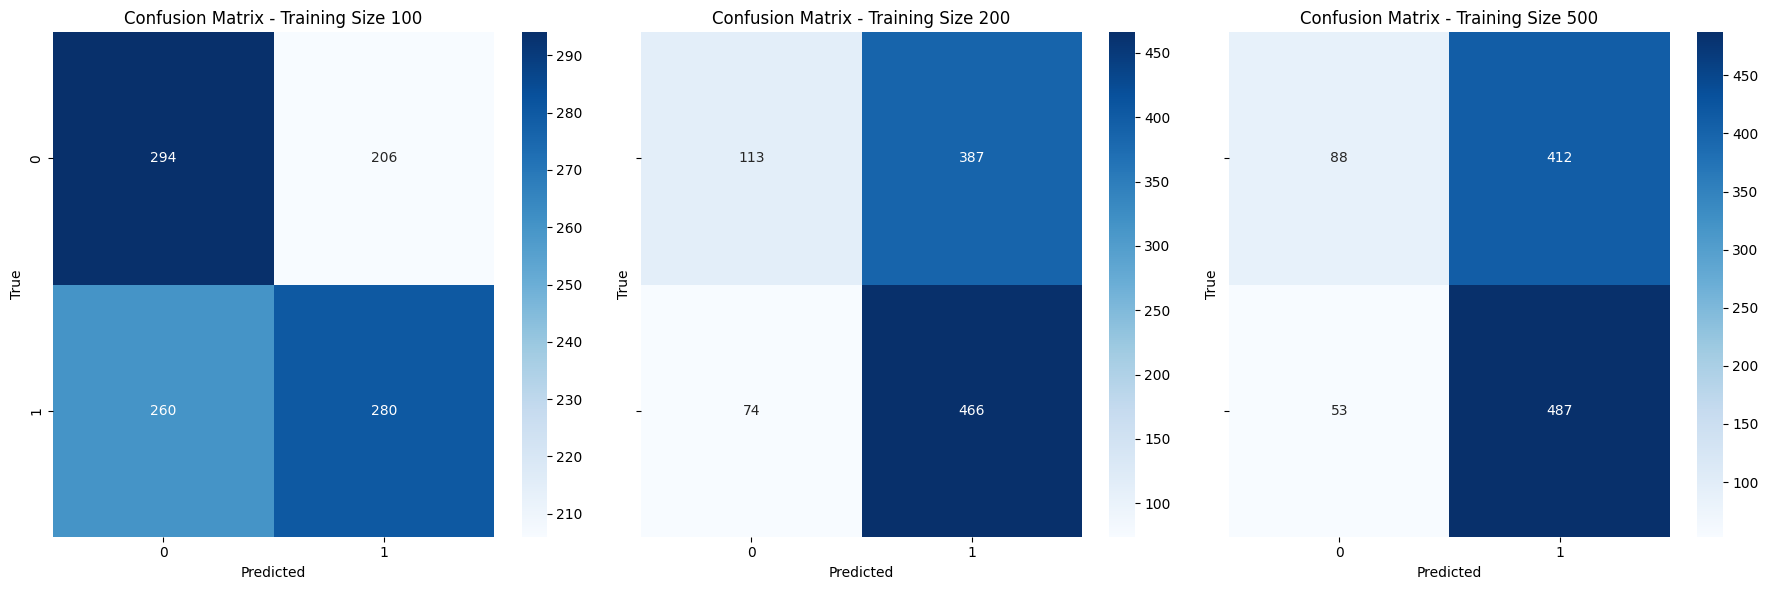

In [12]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

# Definir los tamaños de las muestras
training_sizes = [100, 200, 500]

# Función para convertir las clasificaciones a 1 o 0
def convert_classification(row):
    if 'normal' in row:
        return 0
    else:
        return 1

# Listas para almacenar los resultados
reports = []
confusion_matrices = []

for size in training_sizes:
    # Cargar los archivos CSV de Google Drive
    test_file = f'/content/drive/My Drive/test_{size}.csv'
    test_results_file = f'/content/drive/My Drive/test_results_{size}.csv'

    test_df = pd.read_csv(test_file)
    test_results_df = pd.read_csv(test_results_file)

    # Convertir la columna de clasificación a 1 o 0
    test_results_df['classification'] = test_results_df['classification'].apply(convert_classification)

    # Calcular las métricas de evaluación
    y_true = test_results_df['labels']
    y_pred = test_results_df['classification']

    report = classification_report(y_true, y_pred, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true, y_pred)

    reports.append(report)
    confusion_matrices.append(confusion_matrix_result)

    print(f"Classification Report for Training Size {size}:\n", classification_report(y_true, y_pred))
    print(f"Confusion Matrix for Training Size {size}:\n", confusion_matrix_result)

# Visualizar los resultados
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, size in enumerate(training_sizes):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f'Confusion Matrix - Training Size {size}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

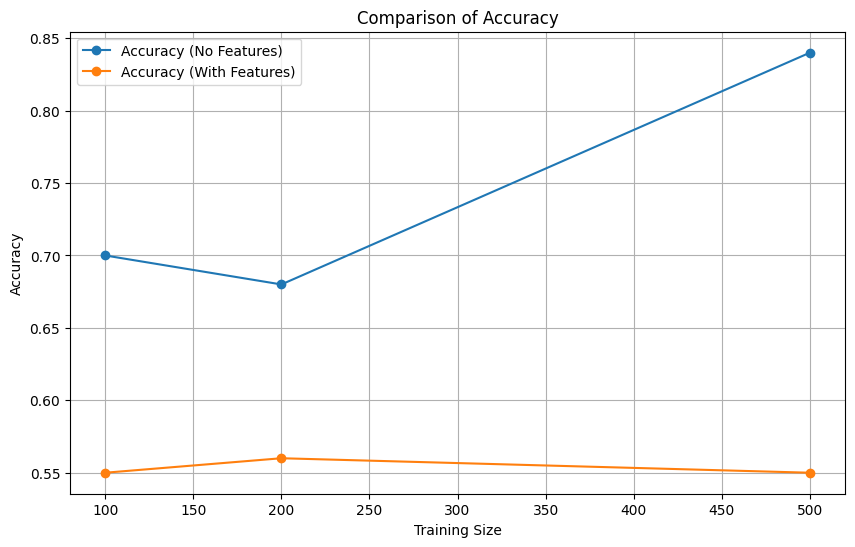

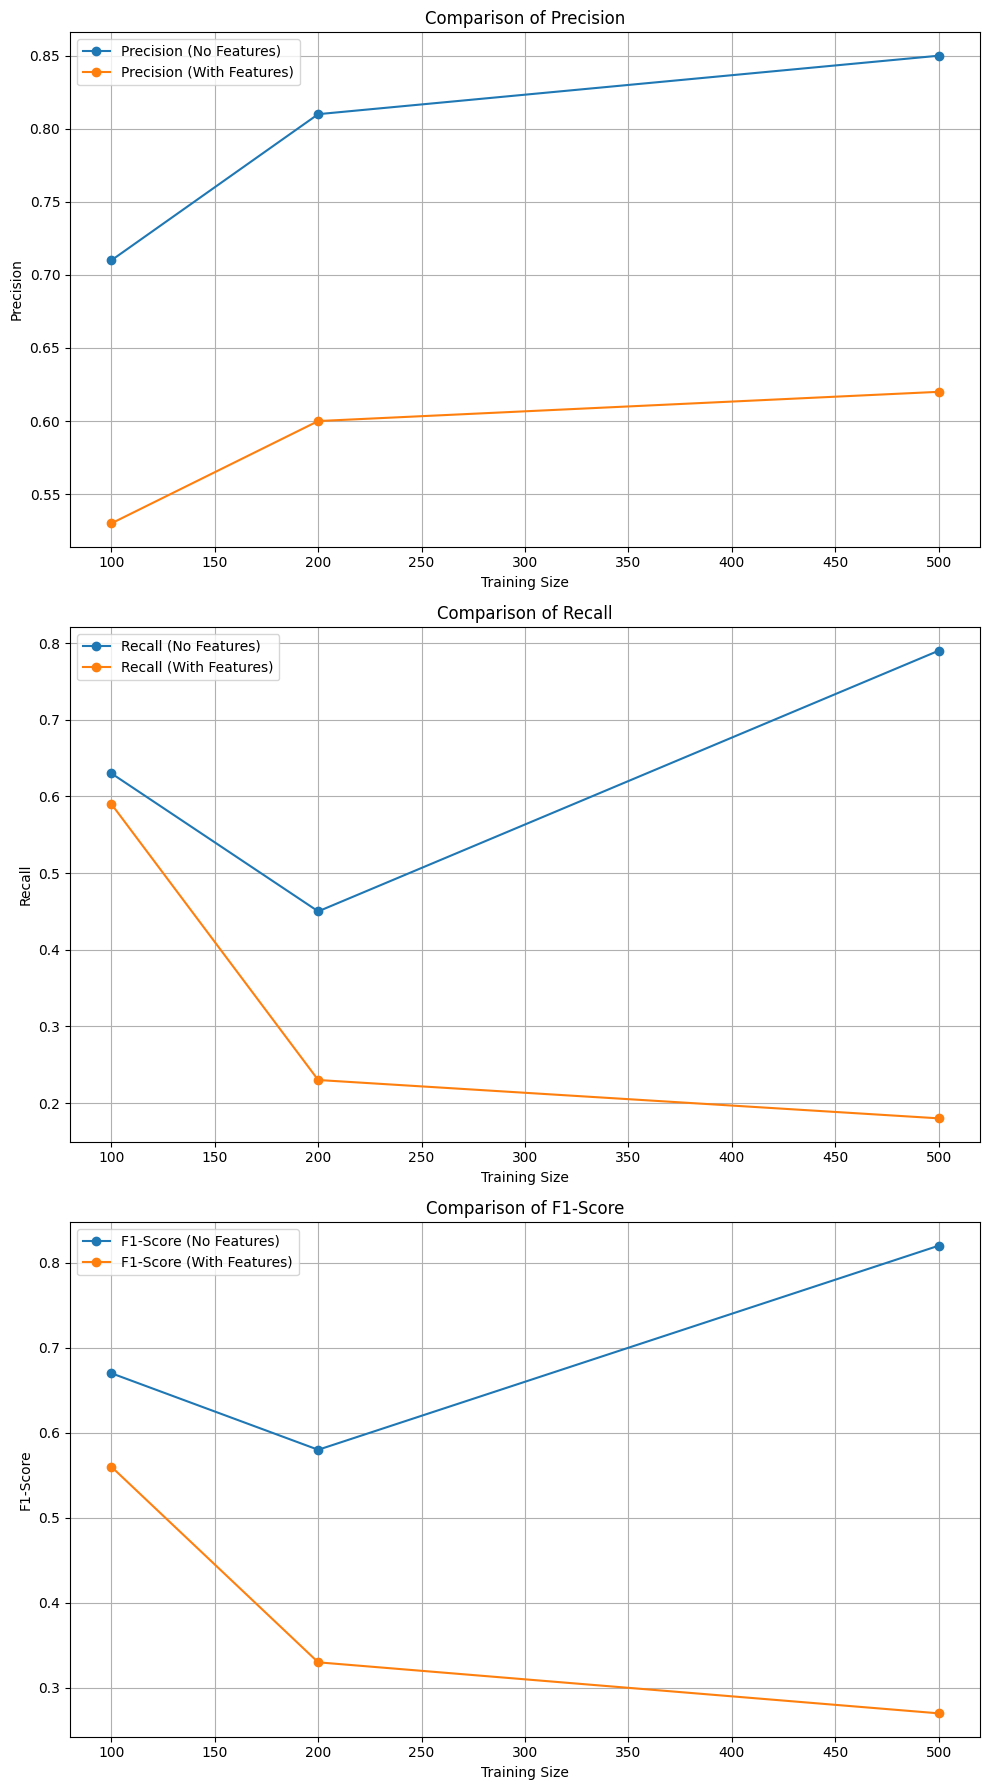

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Classification metrics data
training_sizes = [100, 200, 500]

# Accuracy without additional features
accuracy_no_features = [0.70, 0.68, 0.84]

# Accuracy with additional features
accuracy_with_features = [0.55, 0.56, 0.55]

# Precision, Recall, F1-Score data
precision_no_features = [0.71, 0.81, 0.85]
recall_no_features = [0.63, 0.45, 0.79]
f1_no_features = [0.67, 0.58, 0.82]

precision_with_features = [0.53, 0.60, 0.62]
recall_with_features = [0.59, 0.23, 0.18]
f1_with_features = [0.56, 0.33, 0.27]

# Plotting the comparison of accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracy_no_features, label='Accuracy (No Features)', marker='o')
plt.plot(training_sizes, accuracy_with_features, label='Accuracy (With Features)', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the comparison of precision, recall, f1-score
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Precision comparison
ax[0].plot(training_sizes, precision_no_features, label='Precision (No Features)', marker='o')
ax[0].plot(training_sizes, precision_with_features, label='Precision (With Features)', marker='o')
ax[0].set_xlabel('Training Size')
ax[0].set_ylabel('Precision')
ax[0].set_title('Comparison of Precision')
ax[0].legend()
ax[0].grid(True)

# Recall comparison
ax[1].plot(training_sizes, recall_no_features, label='Recall (No Features)', marker='o')
ax[1].plot(training_sizes, recall_with_features, label='Recall (With Features)', marker='o')
ax[1].set_xlabel('Training Size')
ax[1].set_ylabel('Recall')
ax[1].set_title('Comparison of Recall')
ax[1].legend()
ax[1].grid(True)

# F1-score comparison
ax[2].plot(training_sizes, f1_no_features, label='F1-Score (No Features)', marker='o')
ax[2].plot(training_sizes, f1_with_features, label='F1-Score (With Features)', marker='o')
ax[2].set_xlabel('Training Size')
ax[2].set_ylabel('F1-Score')
ax[2].set_title('Comparison of F1-Score')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()



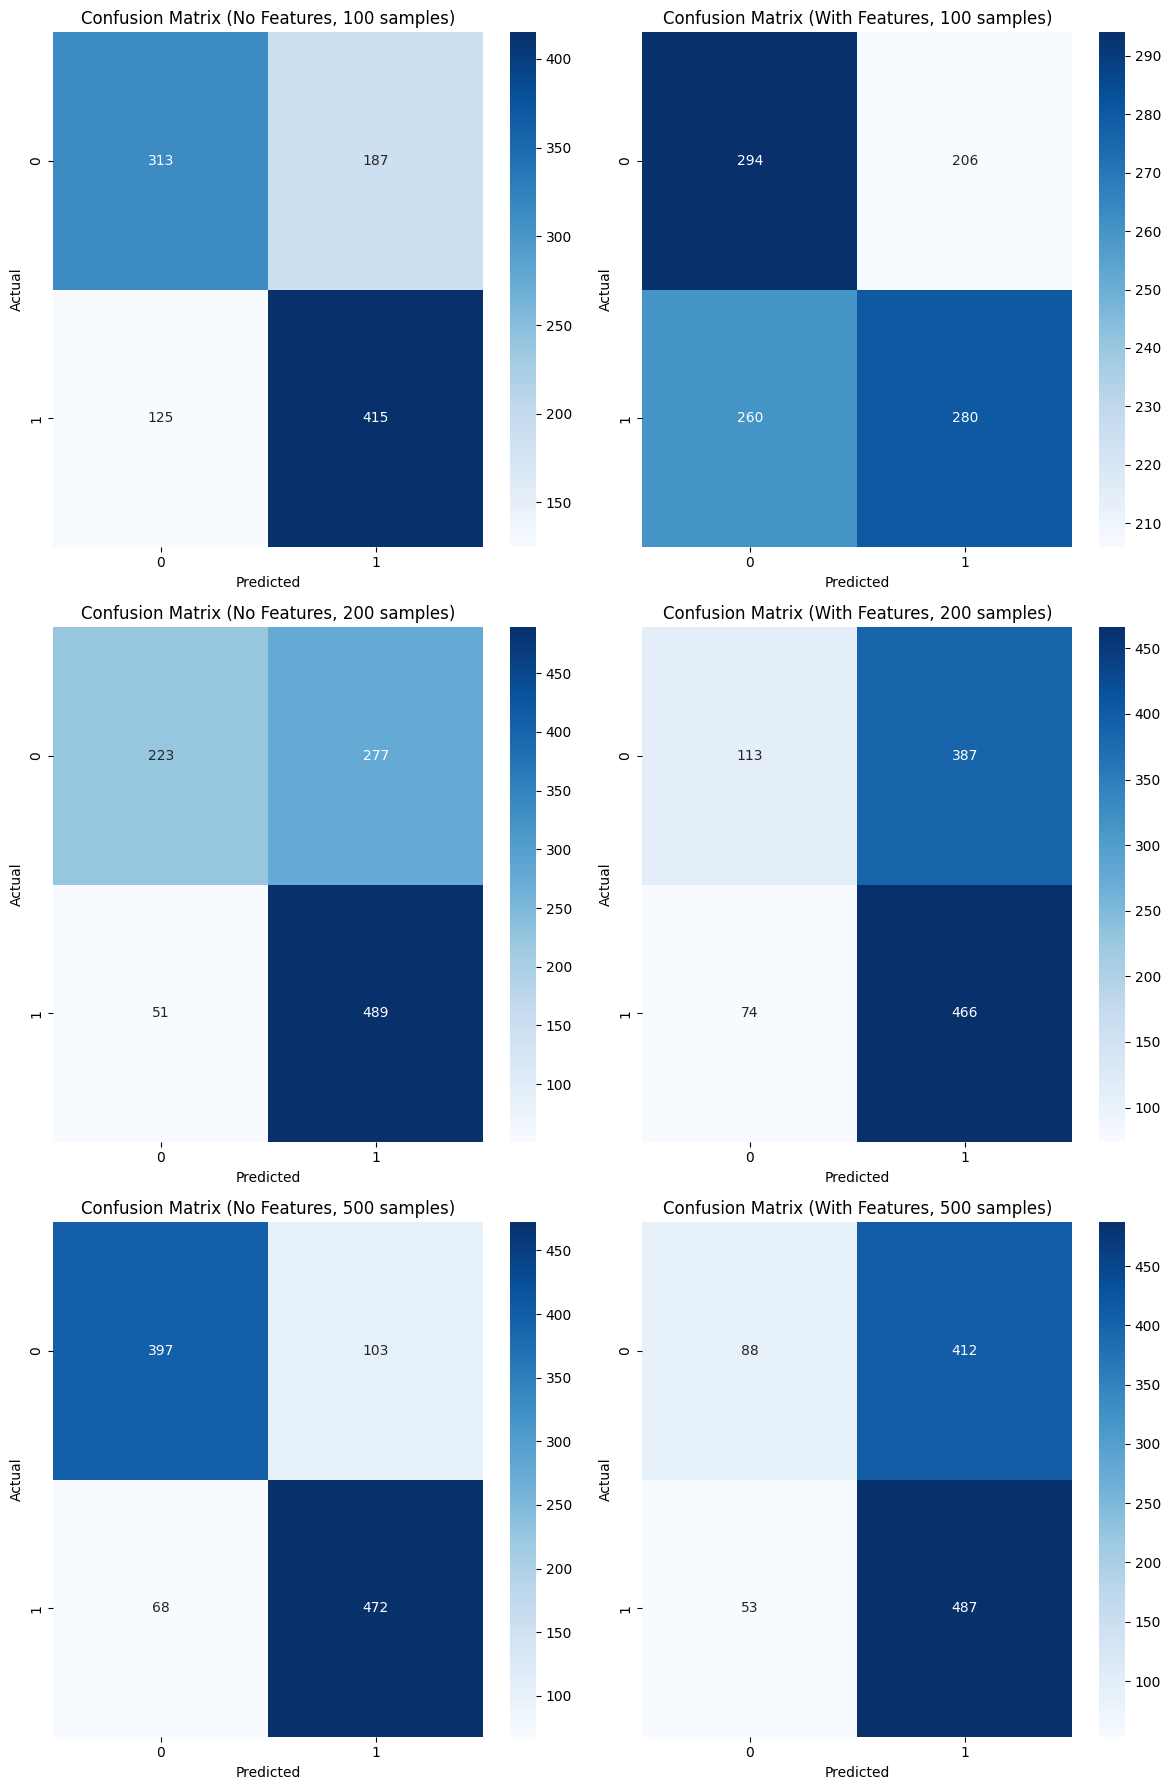

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
conf_matrix_no_features = {
    100: np.array([[313, 187], [125, 415]]),
    200: np.array([[223, 277], [ 51, 489]]),
    500: np.array([[397, 103], [ 68, 472]])
}

conf_matrix_with_features = {
    100: np.array([[294, 206], [260, 280]]),
    200: np.array([[113, 387], [ 74, 466]]),
    500: np.array([[ 88, 412], [ 53, 487]])
}

training_sizes = [100, 200, 500]

# Create confusion matrix plots
fig, axes = plt.subplots(len(training_sizes), 2, figsize=(12, 18))

for i, size in enumerate(training_sizes):
    # Plot confusion matrix without additional features
    sns.heatmap(conf_matrix_no_features[size], annot=True, fmt="d", cmap="Blues", ax=axes[i, 0])
    axes[i, 0].set_title(f'Confusion Matrix (No Features, {size} samples)')
    axes[i, 0].set_xlabel('Predicted')
    axes[i, 0].set_ylabel('Actual')

    # Plot confusion matrix with additional features
    sns.heatmap(conf_matrix_with_features[size], annot=True, fmt="d", cmap="Blues", ax=axes[i, 1])
    axes[i, 1].set_title(f'Confusion Matrix (With Features, {size} samples)')
    axes[i, 1].set_xlabel('Predicted')
    axes[i, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()



In [ ]:
### This is the code for no features model
"""
import requests
import json

def classify_domain(domain, df, url='http://localhost:11434/api/chat'):

    # Create the introductory statement
    intro = (
        "You are a domain name classification system. Your task is to classify domain names as either 'dga' (Domain Generation Algorithm) or 'normal'. "
        "DGA domains are automatically generated by malware, while normal domains are not. "
        "I will provide you with labeled training data containing domain names and their classifications. "
        "After the training phase, you will classify a new domain and respond with either 'dga' or 'normal'. \n\n "

    )

    # Add labeled examples from the DataFrame
    prompt = intro
    for _, row in df.iterrows():
        label = "dga" if row['labels'] == 1 else "normal"
        prompt += f"{row['domain']}\n{{ 'domain': '{row['domain']}', 'result': '{label}' }}\n\n"

    # Add the new domain to classify
    prompt += f"{{ 'Now you classify this domain': '{domain}', 'only answer dga or normal, Do not provide any additional information or explanation ': "

    # Send the prompt to the model
    question = prompt + "}}"



    payload = {
        "model": "llama3",
        "temperature": 0.6,
        "stream": False,
        "messages": [
            {"role": "system", "content": "You are an AI assistant!"},
            {"role": "user", "content": question}
        ]
    }
    response = requests.post(url, json=payload)
    message_str = response.content.decode('utf-8')
    message_dict = json.loads(message_str)
    return message_dict['message']['content']
    """